# Sklearn Preprocessing

## Standardization, or mean removal and variance scaling

 Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values as shown in the left figure below. However, the outliers have an influence when computing the empirical mean and standard deviation.

### The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset:

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ]),
 <BarContainer object of 50 artists>)

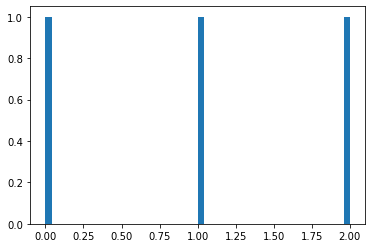

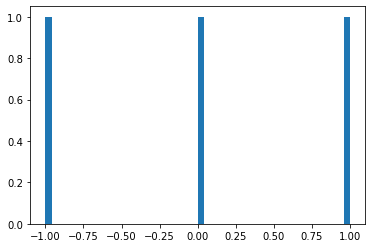

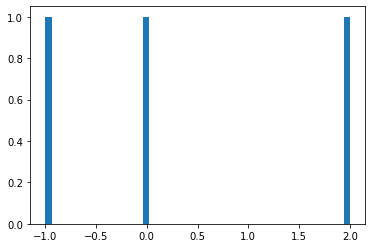

In [2]:
plt.hist(X_train[:,0],bins=50)
plt.figure()
plt.hist(X_train[:,1],bins=50)
plt.figure()
plt.hist(X_train[:,2],bins=50)

In [3]:
X_train.var()

1.1358024691358024

## Notice that:
### mean = preprocessing.StandardScaler().fit(X_train).mean_  (میانگین)
### variance = preprocessing.StandardScaler().fit(X_train).var_ (واریانس)
### Standard_deviation = preprocessing.StandardScaler().fit(X_train).scale_ (انحراف معیار)

In [4]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [5]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [6]:
scaler.var_

array([0.66666667, 0.66666667, 1.55555556])

In [7]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
X_scaled.mean()

4.9343245538895844e-17

In [9]:
X_scaled.var()

1.0

####  Compute the standard deviation of the given data (array elements) along the specified axis(if any).. Standard Deviation (SD) is measured as the spread of data distribution in the given data set.

In [10]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [11]:
X_scaled.std(axis=0)

array([1., 1., 1.])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.06904497, -1.02093794, -0.97283092, -0.9247239 , -0.87661687,
        -0.82850985, -0.78040283, -0.7322958 , -0.68418878, -0.63608176,
        -0.58797473, -0.53986771, -0.49176069, -0.44365366, -0.39554664,
        -0.34743961, -0.29933259, -0.25122557, -0.20311854, -0.15501152,
        -0.1069045 , -0.05879747, -0.01069045,  0.03741657,  0.0855236 ,
         0.13363062,  0.18173764,  0.22984467,  0.27795169,  0.32605872,
         0.37416574,  0.42227276,  0.47037979,  0.51848681,  0.56659383,
         0.61470086,  0.66280788,  0.7109149 ,  0.75902193,  0.80712895,
         0.85523597,  0.903343  ,  0.95145002,  0.99955704,  1.04766407,
         1.09577109,  1.14387812,  1.19198514,  1.24009216,  1.28819919,
         1.33630621]),
 <BarContainer object

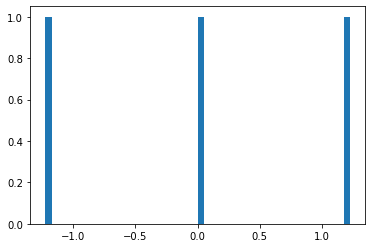

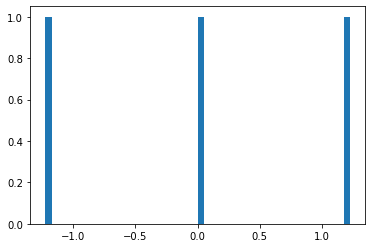

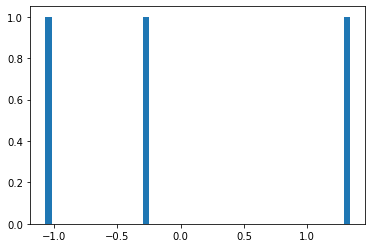

In [12]:
plt.hist(X_scaled[:,0],bins=50)
plt.figure()
plt.hist(X_scaled[:,1],bins=50)
plt.figure()
plt.hist(X_scaled[:,2],bins=50)

In [13]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

### Note that :

#### - Make Classification :  Generate a random n-class classification problem. This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative -dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class.

#### -This function takes a loaded dataset as input and returns the dataset split into two subsets: 
#### train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

#### test_size: this is a float value whose value ranges between 0.0 and 1.0. it represents the proportion of our test size. its default value is none. 
#### train_size: this is a float value whose value ranges between 0.0 and 1.0. it represents the proportion of our train size. its default value is none.
#### random_state: this parameter is used to control the shuffling applied to the data before applying the split. it acts as a seed.
#### shuffle: This parameter is used to shuffle the data before splitting. Its default value is true.
#### stratify: This parameter is used to split the data in a stratified fashion.

fit() that only fit the data which is synonymous to train, that is fit the data means train the data. score is something like testing or predict.So one should use different dataset for training the classifier and testing the acuracy

### It is possible to disable either centering or scaling by either passing with_mean=False or with_std=False to the constructor of StandardScaler.

## Scaling features to a range

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data

### MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:
#### X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#### X_scaled = X_std * (max - min) + min

In [14]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

### MaxAbsScaler(*, copy=True)

Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

MaxAbsScaler works in a very similar fashion, but scales in a way that the training data lies within the range [-1, 1] by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

Here is how to use the toy data from the previous example with this scaler:

In [15]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### Scaling sparse data
Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.

MaxAbsScaler was specifically designed for scaling sparse data, and is the recommended way to go about this. However, StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor. Otherwise a ValueError will be raised as silently centering would break the sparsity and would often crash the execution by allocating excessive amounts of memory unintentionally. RobustScaler cannot be fitted to sparse inputs, but you can use the transform method on sparse inputs.

Note that the scalers accept both Compressed Sparse Rows and Compressed Sparse Columns format (see scipy.sparse.csr_matrix and scipy.sparse.csc_matrix). Any other sparse input will be converted to the Compressed Sparse Rows representation. To avoid unnecessary memory copies, it is recommended to choose the CSR or CSC representation upstream.

Finally, if the centered data is expected to be small enough, explicitly converting the input to an array using the toarray method of sparse matrices is another option.

### Scaling data with outliers
If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

### RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.